In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from astropy.visualization import make_lupton_rgb
import os
from hydra import initialize, compose
from hydra.utils import instantiate

with initialize(config_path="../", version_base = None):
    cfg = compose("config_descwl")

In [2]:
def create_rgb(image, bgr=[0,1,2], stretch=1, Q=8, scale=[0.85,0.9,1.0]):
    if scale is None:
        r_im = image[bgr[2]]
        g_im = image[bgr[1]]
        b_im = image[bgr[0]]
    else:
        # manually re-scaling the images here
        r_im = image[bgr[2]] * scale[0]
        g_im = image[bgr[1]] * scale[1]
        b_im = image[bgr[0]] * scale[2]

    rgb = make_lupton_rgb(image_r=r_im,
                          image_g=g_im,
                          image_b=b_im,
                          stretch=stretch, Q=Q)

    return rgb

In [3]:
image = torch.load(cfg.paths.cached_data + '/' + os.listdir(cfg.paths.cached_data)[0])[0]['images']

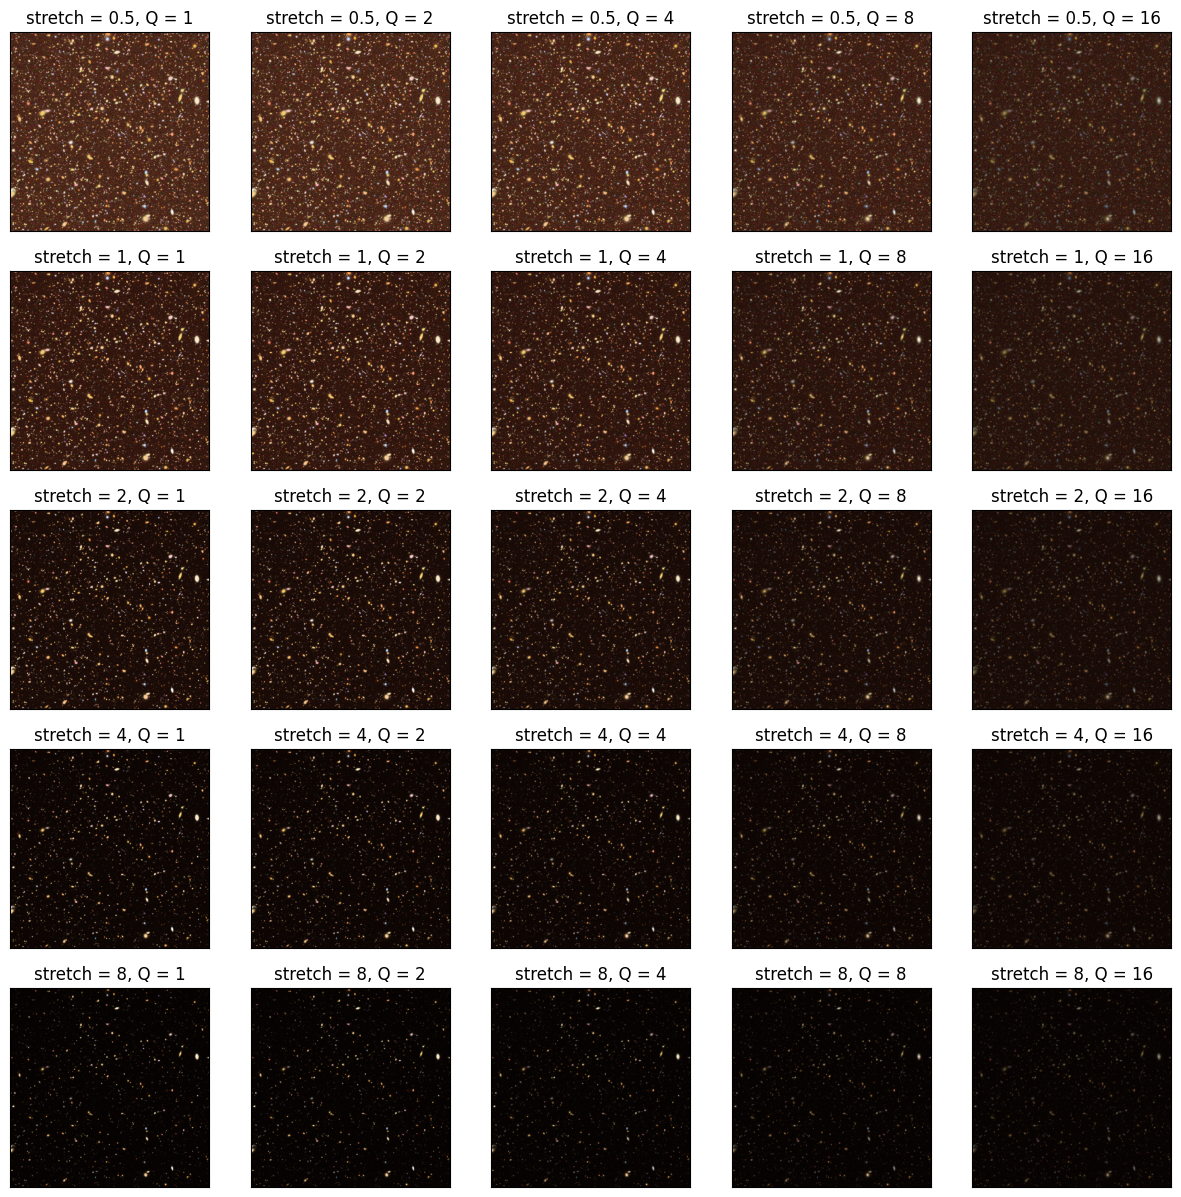

In [4]:
fig, ax = plt.subplots(5, 5, figsize = (15,15))

stretch = [0.5, 1, 2, 4, 8]
Q = [1, 2, 4, 8, 16]

for i in range(len(stretch)):
    for j in range(len(Q)):
        image_color = create_rgb(image, stretch=stretch[i], Q=Q[j])
        _ = ax[i,j].imshow(image_color, origin='lower')
        _ = ax[i,j].set_xticks([])
        _ = ax[i,j].set_yticks([])
        _ = ax[i,j].set_title(f'stretch = {stretch[i]}, Q = {Q[j]}')

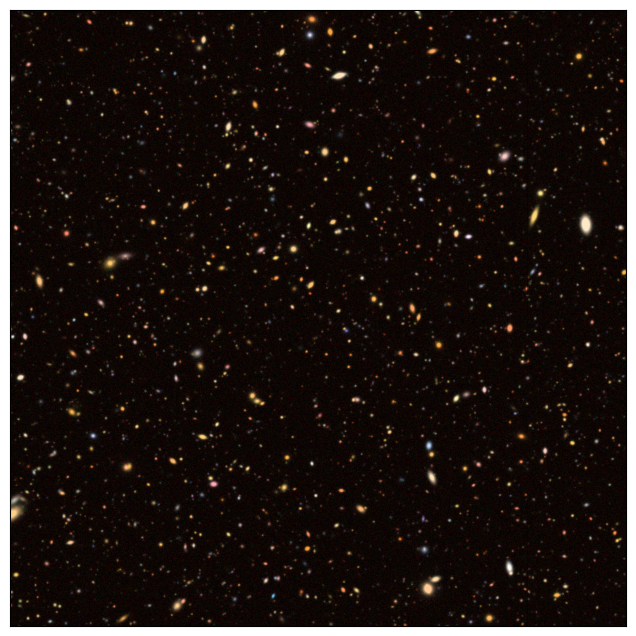

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
_ = ax.imshow(create_rgb(image, stretch=4, Q=4), origin = 'lower')
_ = ax.set_xticks([])
_ = ax.set_yticks([])

fig.savefig("figures/descwl_image.png", dpi = 300, transparent = True, bbox_inches = 'tight', pad_inches = 0)